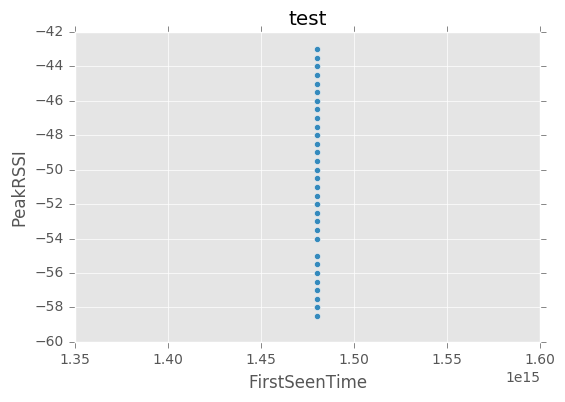

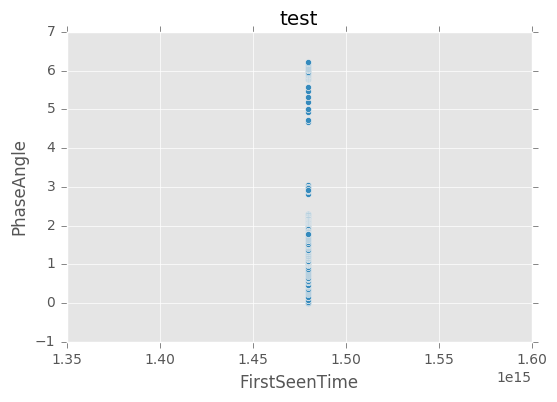

In [34]:
%matplotlib inline
from pandas import *
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

DF = read_csv("TH_3.csv", na_values=[""],header=0)

# plot
plt.figure()
ax = DF.plot.scatter(x='FirstSeenTime', y='PeakRSSI')
ax.set_title('test')
#ax.set_ylim([-60,-50])
plt.show()
plt.figure()
ax = DF.plot.scatter(x='FirstSeenTime', y='PhaseAngle')
ax.set_title('test')
#ax.set_ylim([-60,-50])
plt.show()

[]


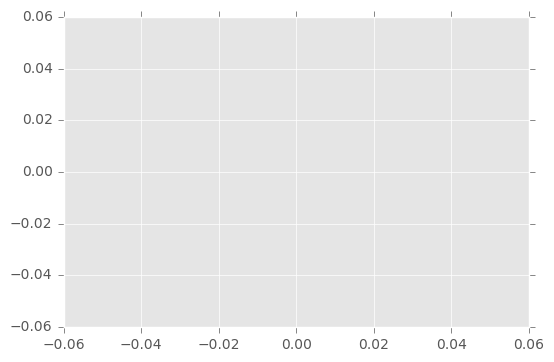

In [32]:
from scipy import interpolate
import numpy as np
#DF_touch2 = read_csv("Th_2_touch.csv", na_values=[""],header=0)
#DF_touch2.dropna(axis='index')
time = DF['FirstSeenTime'].values.tolist()
index0 = list()
index0.append(0)
for i in range(1,len(time)):
        index0.append(time[i]-time[0])
#print index0
#interpolate. weighted average over n nearest samples. 
rssi = DF['PeakRSSI'].values.tolist()
index1 = np.arange(index0[0],index0[len(index0)-1],1600)
print index1
i=0;
n_smooth = 4;
rssi_s = list()
for index in index1:
    # find the first item that's larger than index value
    while(index0[i]<=index):
        i = i + 1;
    # weighted average on the nearest 10 data points
    low_s = int(np.ceil(-n_smooth/2))+i
    high_s = int(np.floor(n_smooth/2))+i
    weights = list()
    # calculate weights
    for j in range(low_s,high_s):
        if(j<0):
            low_s=0
            continue  
        if(j>=len(index0)-1):
            high_s = len(index0)-1
            continue
        weights.append(1/abs(index0[j]-index))
    #print len(weights)
    #print len(rssi[low_s:high_s])
    #print weights
    #print rssi[low_s:high_s]
    rssi_s.append(np.average(rssi[low_s:high_s],weights=weights))
    
plt.figure()
plt.scatter(index1,rssi_s)
plt.show()
#well, seems the smoooth doesn't do too much shit. The reason is there is bipolar changing states when tag is touched. 